# Housing Dataset

**Price prediction & House Recommendation System**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = "USA_Housing.csv"
df = pd.read_csv(data)
df

## Attribute understanding

1. **Avg. Area Income:** This is an average Income that the people are earning in this area.
2. **Avg. Area House Age:** An average age of house is given which varies from 2-9 years.
3. **Avg. Area Number of Rooms:** An average number of rooms in the area which may affect the price of the house.
4. **Avg. Area Number of Brdrooms:** An average number of bedrooms that are there in the given area.
5. **Area Population:** Number of people living in that area.
6. **Price:** This the price of the house that is to be calculated on the basis of the above attributes.
7. **Address:** It is the address of that residence where this price houses are there.

> **note:** This data has all the average data so that the price that would be predicted would also be average


In [ ]:
df.info()

- there are no null values in any of the rows present, so we are good to go.


In [ ]:
df_describe = df.describe()
df_describe

**Now let us see that data is describing to us**

- Count of each row is 5000 as it is not having any null values in there so we are getting a complete row count.
- In the second row we are given the average of the average values, sounds funny right.. Jokes apart, mean is basically the measurment of central tendency and gives us the average of the distribution.
- std: which is also know as standard deviation which help us to know the trend of the data and help us to gain a perspective and low level understanding.
- min: Minimum value that is present in the dataset.
- max: maximum value that is present in the dataset.

> this is the description based on the statstical calculation of the data.


In [ ]:
df.plot(x='Avg. Area Income', y='Price', style='o')
plt.title('Avg. Area Income vs Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

**Now let us see that how does Avg. Area Income affects the price of the house.**

- it increases the price of the house as the income increases.
- it is a positive correlation.


In [ ]:
df_plot = df.drop(['Address'], axis=1)
df_corr = df_plot.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

In [ ]:
df_above_avg_income = df[(df['Avg. Area Income'] > df_describe['Avg. Area Income']['mean']) & (
    df['Price'] > df_describe['Price']['mean'])]
df_above_avg_income

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df[['Avg. Area Income', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

y_pred = regressor.predict(X_test)

df_pred = pd.DataFrame(
    {'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

In [ ]:
# accuracy
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))

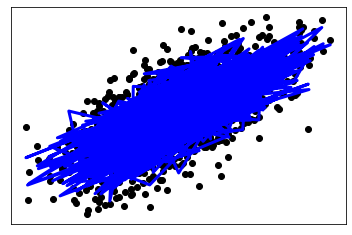

In [23]:
# plot outputs
plt.scatter(X_test['Avg. Area Income'], y_test,  color='black')
plt.plot(X_test['Avg. Area Income'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [27]:
import pickle

# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [28]:
# give the address according to the price
address = df[(df['Price'] <= y_pred.mean())]

In [30]:
list_address = list(address.iloc[0:10][['Address', 'Price']].values)

In [31]:
list_address

[array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101', 1059033.56],
       dtype=object),
 array(['9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', 1058987.99],
       dtype=object),
 array(['USNS Raymond\nFPO AE 09386', 630943.49], dtype=object),
 array(['06039 Jennifer Islands Apt. 443\nTracyport, KS 16077', 1068138.07],
       dtype=object),
 array(['USS Gilbert\nFPO AA 20957', 798869.53], dtype=object),
 array(['911 Castillo Park Apt. 717\nDavisborough, PW 78603', 663732.4],
       dtype=object),
 array(['209 Natasha Stream Suite 961\nHuffmanland, NE 52457', 1042814.1],
       dtype=object),
 array(['5498 Rachel Locks\nNew Gregoryshire, PW 54755', 528485.25],
       dtype=object),
 array(['Unit 7424 Box 2786\nDPO AE 71255', 1019425.94], dtype=object),
 array(['19696 Benjamin Cape\nStephentown, ME 36952-4733', 1030591.43],
       dtype=object)]

# Deep Learning Method


> installing pytorch


In [32]:
!pip3 install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable


Import the libraries

In [34]:
import torch
from torch.autograd import Variable

ModuleNotFoundError: No module named 'torch'

created a data variable which tends to fit in the data X (features) and y (test) to train our model

In [35]:
X = Variable(torch.Tensor(df[['Avg. Area Income', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']].values))
y = Variable(torch.Tensor(df['Price'].values))

NameError: name 'Variable' is not defined

In [36]:
print(X)

      Avg. Area Income  Avg. Area Number of Rooms  \
0          79545.45857                   7.009188   
1          79248.64245                   6.730821   
2          61287.06718                   8.512727   
3          63345.24005                   5.586729   
4          59982.19723                   7.839388   
...                ...                        ...   
4995       60567.94414                   6.137356   
4996       78491.27543                   6.576763   
4997       63390.68689                   4.805081   
4998       68001.33124                   7.130144   
4999       65510.58180                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09      23086.80050  
1                             3.09      40173.07217  
2                             5.13      36882.15940  
3                             3.26      34310.24283  
4                             4.23      26354.10947  
...                            ...     

In [37]:
print(y)

[[1059033.56]
 [1505890.92]
 [1058987.99]
 ...
 [1030729.58]
 [1198656.87]
 [1298950.48]]


Moving further here I have created a linear regression model with 4 features

In [ ]:
class LinearRegression(torch.nn.Module):

    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(4, 1)

    def forward(self, x):
        predict_y = self.linear(x)
        return predict_y

In [38]:
linear_model = LinearRegression()

created the criterias for loss function and optimizers to imporve the accuracy of the model
- we have used Mean Squared Error as our loss function which is also a legacy loss function for regression problems
- we have used Stocastic Gradient Descent as our optimizer which is an iterative method for optimizing an objective function

In [39]:
define_criterion = torch.nn.MSELoss(size_average=False)

SGD_optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)

NameError: name 'torch' is not defined

Here we go..
we have started our traing here with 25 epochs

In [40]:
for epoch in range(1): 
    predict_y = linear_model(X) 
    loss = define_criterion(predict_y, y) 
    SGD_optimizer.zero_grad() 
    loss.backward() 

    SGD_optimizer.step() 
    print('epoch {}, loss function {}'.format(epoch+1, loss.item()))

TypeError: 'LinearRegression' object is not callable

NOW IT'S TIME TO TEST the model

In [41]:
test = Variable(torch.Tensor([[79248.64245, 6.730821, 3.09, 1059033.56]]))
predict = linear_model(test)
print("predict value: ", predict.data[0][0])

NameError: name 'Variable' is not defined